In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Name : Titanic Survival Prediction**
Titanic survival prediction involves analyzing the dataset of Titanic passengers, exploring factors such as age, gender, class and embarked port to predict whether a passenger survived or not. The project aims to showcase the application of machine learning techniques, data analysis and feature engineering to extract meaningful insights from the dataset and build a reliable model for predicting survival outcomes based on various passenger attributes.

In [4]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [5]:
# Loading the dataset to a pandas DataFrame
titanic_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_dataset.csv')

In [6]:
# First 5 rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Last 5 rows of the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# **Data Preprocessing**

In [8]:
# Find shape of our dataset(Number of rows and number of columns)
print("Number of Rows", titanic_data.shape[0])
print("Number of Columns", titanic_data.shape[1])

Number of Rows 418
Number of Columns 12


In [9]:
# Getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
# Checking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Handling the missing values**

In [11]:
# Dropping the "Cabin" column from the dataset
titanic_data = titanic_data.drop(columns = 'Cabin', axis = 1)

In [12]:
# Replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [13]:
# Replacing the missing value in "Fare" column with mean value
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace = True)

In [14]:
# Rechecking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Identifying duplicated values
titanic_data.duplicated().any()

False

There is no duplicated values

# **Feature Engineering**
**Exploratory Data Analysis**

In [39]:
# Getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
# Finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

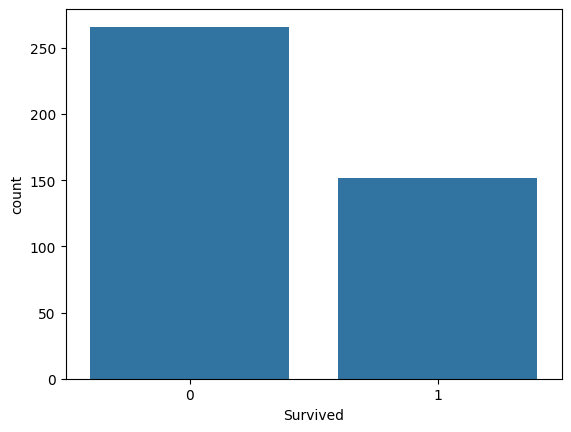

In [41]:
# Making a count plot for "Survived" column
sns.countplot(x = 'Survived', data = titanic_data)

In [42]:
# Finding the total number of male and female passengers
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

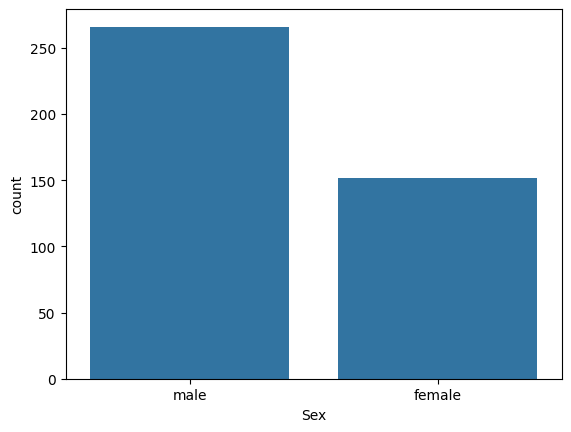

In [43]:
# Making a count plot for "Sex" column
sns.countplot(x = 'Sex', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

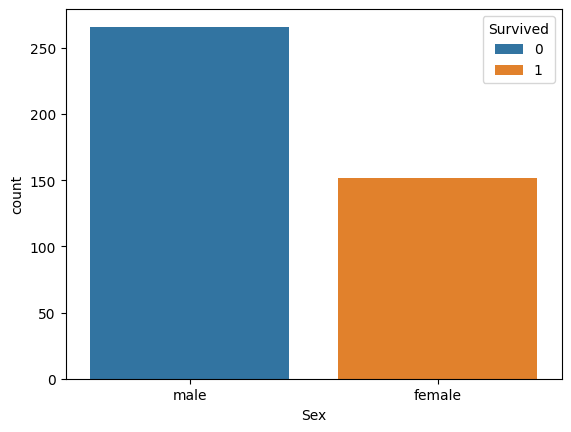

In [44]:
# Number of survivors Genderwise
sns.countplot(x ='Sex', hue= 'Survived', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

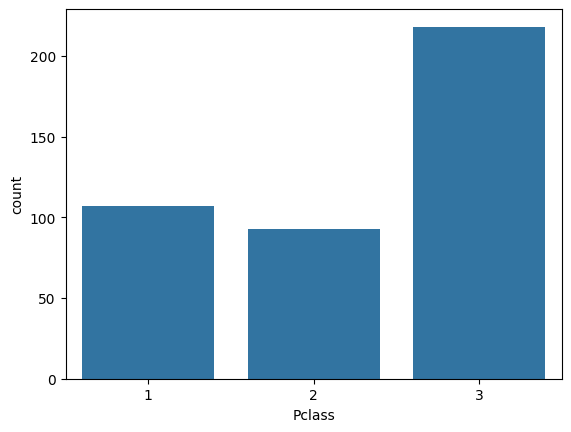

In [45]:
# Making a count plot for "Pclass" column
sns.countplot(x = 'Pclass', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

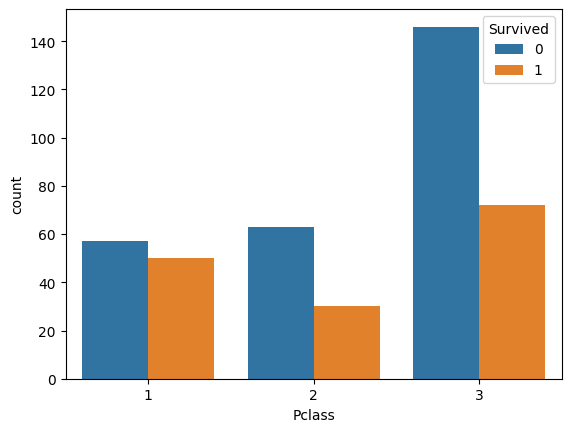

In [46]:
# Number of survivors Pclasswise
sns.countplot(x ='Pclass', hue= 'Survived', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

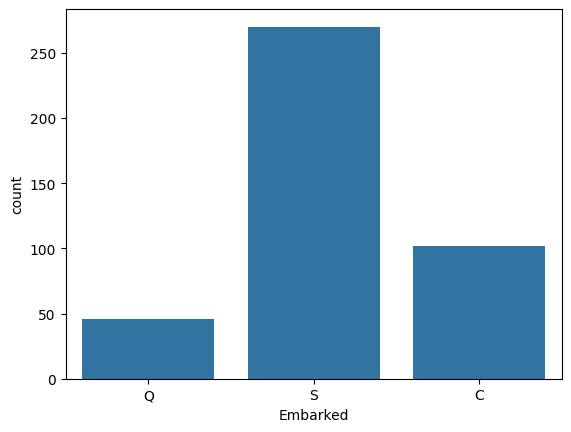

In [47]:
# Making a count plot for "Embarked" column
sns.countplot(x = 'Embarked', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

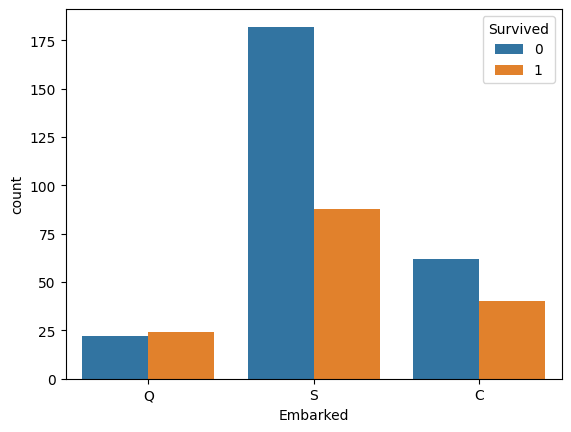

In [48]:
# Number of survivors embarked
sns.countplot(x ='Embarked', hue= 'Survived', data = titanic_data)

**Encoding the categorical columns**

In [49]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [50]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [51]:
# Converting categorical columns
titanic_data.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked':{'S' :0, 'C' :1, 'Q' :2}}, inplace = True)

In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [53]:
# Separating features and target
X = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = titanic_data['Survived']

In [54]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [55]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [56]:
# Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


# **Model Building**

**Model training**

In [58]:
# List of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]

In [59]:
# Creating the function for comparing models
def compare_models_train_test():

  for model in models:

    # Training the model
    model.fit(X_train, Y_train)

    # Evaluating the model on training data
    train_data_prediction = model.predict(X_train)
    accuracy = accuracy_score(train_data_prediction, Y_train)
    print('Accuracy score of the', model, 'on training data =', accuracy)

In [60]:
compare_models_train_test()

Accuracy score of the LogisticRegression(max_iter=1000) on training data = 1.0
Accuracy score of the KNeighborsClassifier() on training data = 0.8023952095808383
Accuracy score of the RandomForestClassifier(random_state=0) on training data = 1.0


In [61]:
# Model Evaluation on test data
lr = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
prediction = lr.predict(X_test)

In [62]:
print(confusion_matrix(prediction, Y_test))
print(accuracy_score(prediction, Y_test))
print(classification_report(prediction, Y_test))

[[51  0]
 [ 0 33]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# **Save Model**

In [63]:
# Saving the model as pickle file
pickle.dump(lr, open('model_save', 'wb'))

In [64]:
# Loading the pickle file for prediction
md = pickle.load(open('/content/model_save', 'rb'))

In [65]:
# Creating a customized transaction
passenger_data = pd.DataFrame({
    'Pclass' : [3],
    'Sex' : [0],
    'Age' : [34.5],
    'SibSp' : [0],
    'Parch' : [0],
    'Fare' : [7.8292],
    'Embarked'	: [2],
    })

In [66]:
# Customized Prediction
new_predictions = md.predict(passenger_data)
if new_predictions == 1:
    print('Prediction: Survived')
else :
    print('Prediction : Not Survived')

Prediction : Not Survived
